# Final Data Identification

For next Monday, you should aim to identify and load a dataset that you will work on for your final project.  This project will involve you exploring this dataset, including using either a classification or regression problem as a modeling component.  

Your dataset should have the following criteria:

- More than 1000 rows
- A mixture of variable types


In addition to acquiring the dataset, you should aim to begin your EDA process.  Be very clear about stating the questions that your code is engaging. Your final product will be a Jupyter notebook and 5 minute in-class presentation.  In advance of this, next Monday plan to introduce your project in 1 minute or less including some visual support.


----------------------------------------------------------------------------------------------------------------------

# __<u>Final Project</u>__

## Mental Health in the Tech Industry

![](images/mental-health.jpg) 

   ![](images/sad_programmer.jpg) 

![](images/life_motto.jpg)

### Columns 

This dataset (2014) contains the following data:

- Timestamp
- Age
- Gender
- Country
- state: If you live in the United States, which state or territory do you live in?
- self_employed: Are you self-employed?
- family_history: Do you have a family history of mental illness?
- treatment: Have you sought treatment for a mental health condition?
- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?
- no_employees: How many employees does your company or organization have?
- remote_work: Do you work remotely (outside of an office) at least 50% of the time?
- tech_company: Is your employer primarily a tech company/organization?
- benefits: Does your employer provide mental health benefits?
- care_options: Do you know the options for mental health care your employer provides?
- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?
- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?
- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?
- leave: How easy is it for you to take medical leave for a mental health condition?
- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
- coworkers: Would you be willing to discuss a mental health issue with your coworkers?
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?
- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
- comments: Any additional notes or comments

### This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace.

### Source: Open Sourcing Mental Illness (OSMI)

https://www.kaggle.com/osmi/mental-health-in-tech-survey

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import mglearn

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier

In [2]:
mhealth = pd.read_csv('data/mental_health_survey.csv')

In [3]:
mhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

In [4]:
mhealth.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
mhealth.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [6]:
mhealth.Gender.value_counts()

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Man                                                 2
Female                                              2
Female (trans)                                      2
Cis Male                                            2
Neuter                                              1
Femake                                              1
fluid                                               1
maile                       

__Looking at the gender column, it appears this selection was not restricted in the survey as respondents were able to input anything. The column also contains typos such as "Make", "Malr", and "Msle".__

In [7]:
mhealth.Country.value_counts()

United States             751
United Kingdom            185
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Sweden                      7
Italy                       7
Switzerland                 7
Belgium                     6
South Africa                6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Russia                      3
Mexico                      3
Finland                     3
Austria                     3
Portugal                    2
Colombia                    2
Croatia                     2
Denmark                     2
Greece                      2
Latvia                      1
Bahamas, The                1
Norway                      1
Spain                       1
Hungary   

In [8]:
mhealth.obs_consequence.value_counts()

No     1075
Yes     184
Name: obs_consequence, dtype: int64

__It appears that the obs_consequence column which asks if the respondent has heard/seen negative consequences for workers with mental health conditions is solely Yes/No. This will be easy to convert it to binary for a Classification problem.__

In [9]:
obs_consequence_dum = pd.get_dummies(mhealth.obs_consequence, drop_first = True)

In [10]:
obs_consequence_dum.head()

,Yes
0,0
1,0
2,0
3,1
4,0


In [11]:
mhealth['obs_consequence_dum'] = obs_consequence_dum

In [12]:
mhealth.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments,obs_consequence_dum
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN,0
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Maybe,No,No,No,No,No,Don't know,No,NaN,0
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,No,No,Yes,Yes,Yes,Yes,No,No,NaN,0
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN,1
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN,0


In [13]:
mhealth.obs_consequence_dum.dtype

dtype('uint8')

__By using the 'pd.get_dummies' method I converted the 'Yes' and 'No' values in the obs_consequence column to binary values to prepare for a Classification problem using LogisticRegression. By performing '.value_counts' on the data, the conversion was successful.__

In [14]:
mhealth.obs_consequence_dum.value_counts()

0    1075
1     184
Name: obs_consequence_dum, dtype: int64

In [15]:
mhealth.Age.value_counts()

 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

In [16]:
tech_company_dum = pd.get_dummies(mhealth.tech_company, drop_first = True)

In [17]:
mhealth['tech_company_dum'] = tech_company_dum

In [18]:
mhealth.tech_company_dum.value_counts()

1    1031
0     228
Name: tech_company_dum, dtype: int64

__As with all LogisticRegression problems a train_test_split is performed to split the data into training and testing data set.__

In [19]:
X = mhealth[['Age', 'tech_company_dum']]
y = mhealth.obs_consequence_dum
X_train, X_test, y_train, y_test = train_test_split(X, y)

__Using age and whether or not the company is tech company to determine if there were negative consequences for employees with mental illness.__

In [20]:
mhealth.tech_company_dum.dtype

dtype('uint8')

In [21]:
mhealth.obs_consequence_dum.dtype

dtype('uint8')

In [22]:
mhealth.Age.dtype

dtype('int64')

In [23]:
lgr = LogisticRegression(class_weight = 'balanced')

__class_weight = 'balanced' is used to make sure my data is distributed evenly when performing a split.__

In [24]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [25]:
lgr.score(X_train, y_train)

0.15360169491525424

In [26]:
pred = lgr.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
X_train.shape

(944, 2)

In [28]:
X_test.shape

(315, 2)

In [29]:
y_train.shape

(944,)

In [30]:
y_test.shape

(315,)

In [31]:
precision_score(y_test, pred)

0.12420382165605096

In [32]:
y_test.value_counts()

0    276
1     39
Name: obs_consequence_dum, dtype: int64

In [33]:
pred.dtype

dtype('uint8')

In [34]:
print(classification_report(lgr.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.00      1.00      0.01         1
          1       1.00      0.12      0.22       314

avg / total       1.00      0.13      0.22       315



In [35]:
confusion_matrix(lgr.predict(X_test), y_test)

array([[  1,   0],
       [275,  39]])

In [36]:
mat = confusion_matrix(lgr.predict(X_test), y_test)

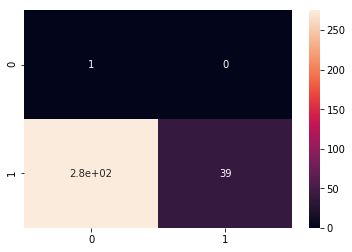

In [37]:
sns.heatmap(mat, annot = True)

__Used a heatmap from Seaborn to depict how many observed negative consequences for employees with mental health conditions were classfied correctly.__

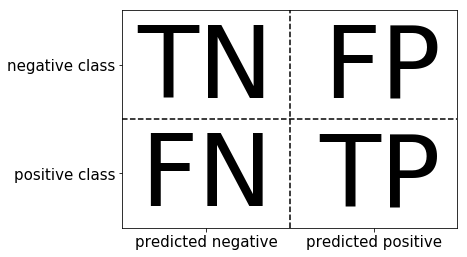

In [38]:
mglearn.plots.plot_binary_confusion_matrix()

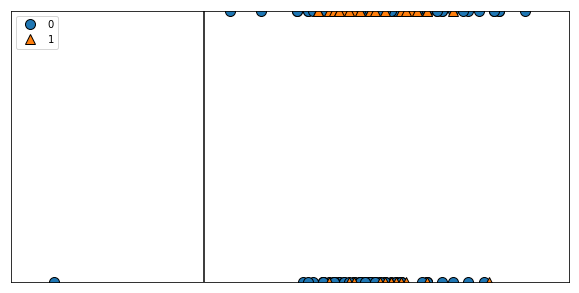

In [39]:
clf = lgr.fit(X_train, y_train)
plt.figure(figsize = (10, 5))
mglearn.plots.plot_2d_separator(clf, np.array(X_test))
mglearn.discrete_scatter(X_test['Age'], X_test['tech_company_dum'], y_test)
plt.ylim(min(X_test['tech_company_dum']), max(X_test['tech_company_dum']))
plt.legend()

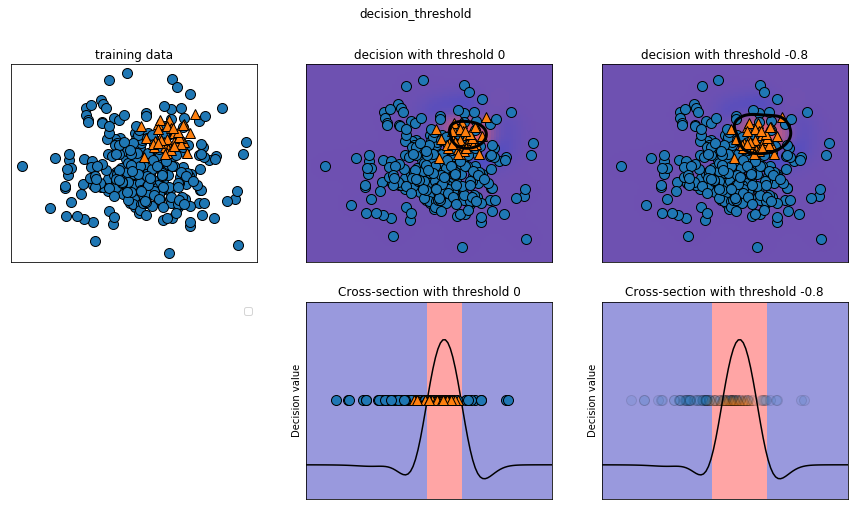

In [40]:
mglearn.plots.plot_decision_threshold()

In [41]:
lowered_thresh = lgr.decision_function(X_test) > -1.0

In [42]:
print(classification_report(lowered_thresh, y_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       1.00      0.12      0.22       315

avg / total       1.00      0.12      0.22       315



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [43]:
precision, recall, thresholds = precision_recall_curve(y_test, lgr.decision_function(X_test))

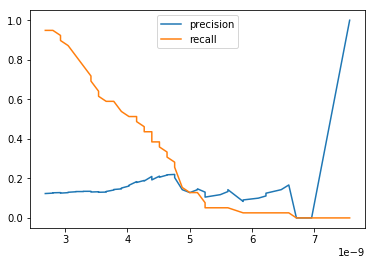

In [44]:
plt.plot(thresholds, precision[1:],  label = 'precision')
plt.plot(thresholds, recall[1:], label = 'recall')
plt.legend()

__The precision recall curve most likely looks this way because the data set did not have true samples and there were no precision and recall scores for "0".__

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, lgr.decision_function(X_test))

Text(0,0.5,'True Positive Rate')

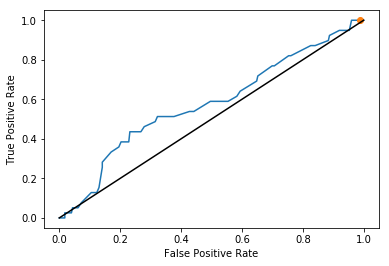

In [46]:
smallest = np.argmin(np.abs(thresholds))
plt.plot(fpr, tpr)
plt.plot(fpr[smallest], tpr[smallest], 'o')
plt.plot(fpr, fpr, c = 'black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [47]:
roc_auc_score(y_test, lgr.predict_proba(X_test)[:, 1])

0.5737179487179488

In [48]:
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression())

In [49]:
params = {'polynomialfeatures__degree': [i for i in range(1, 5)],
         'logisticregression__C': [0.1, 1, 5, 10, 100]}

In [50]:
grid = GridSearchCV(pipe, param_grid=params, cv = 5)

In [51]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4], 'logisticregression__C': [0.1, 1, 5, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [53]:
best = grid.best_estimator_

In [54]:
best.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [55]:
best_pred = best.predict(X_test)

In [56]:
print(classification_report(best_pred, y_test))

             precision    recall  f1-score   support

          0       0.00      1.00      0.01         1
          1       1.00      0.12      0.22       314

avg / total       1.00      0.13      0.22       315



__When running a classification report on this data it seems the data has a class imbalance because there were no true samples for 0 - which could be due to a lack of respondants who didn't work at a tech company__

In [57]:
confusion_matrix(y_test, best_pred)

array([[  1, 275],
       [  0,  39]])

In [58]:
dum_dum = DummyClassifier(strategy='most_frequent')

In [59]:
dum_dum.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [60]:
dum_dum.score(X_train, y_train)

0.8463983050847458

In [61]:
dum_dum_pred = dum_dum.predict(X_train)
print (confusion_matrix(y_train, dum_dum_pred))
print (classification_report(y_train, dum_dum_pred))

[[799   0]
 [145   0]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92       799
          1       0.00      0.00      0.00       145

avg / total       0.72      0.85      0.78       944



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
#LogisticRegressionCV - stratified sampling (stratified k-fold)

In [63]:
#skf = StratifiedKFold(n_splits = 3)

In [64]:
#splits = skf.split(X, y)

In [65]:
#for i in splits:
#    print(splits)

In [66]:
#model = LogisticRegression()
#X = mhealth[['Age', 'tech_company_dum']]
#y = mhealth.obs_consequence_dum
#skf = StratifiedKFold(n_splits = 5)
#skf.split(X, y)


In [67]:
tree = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
tree_pred = tree.predict(X_test)
print (classification_report(y_test, tree_pred))

             precision    recall  f1-score   support

          0       0.87      0.98      0.92       274
          1       0.00      0.00      0.00        41

avg / total       0.75      0.85      0.80       315



In [69]:
#Class 9 Notes

In [70]:
tree_mat = confusion_matrix(tree.predict(X_test), y_test)

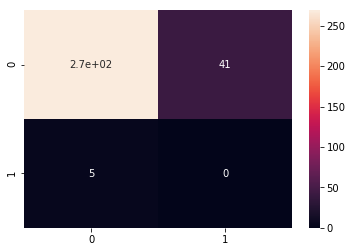

In [71]:
sns.heatmap(tree_mat, annot = True)

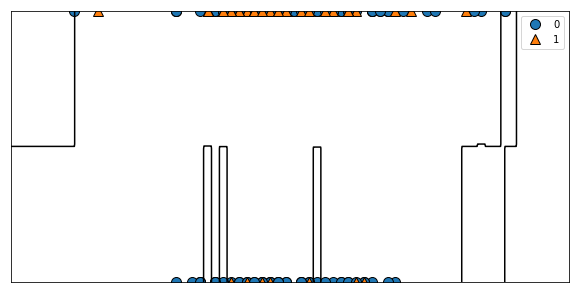

In [72]:
clf_tree = tree.fit(X_train, y_train)
plt.figure(figsize = (10, 5))
mglearn.plots.plot_2d_separator(clf_tree, np.array(X_test))
mglearn.discrete_scatter(X_test['Age'], X_test['tech_company_dum'], y_test)
plt.ylim(min(X_test['tech_company_dum']), max(X_test['tech_company_dum']))
plt.legend()